In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
base_dir = 'experiments/e2_final'

def load_experiment_df(filename):
    return pd.read_csv(filename, dtype={'episode': int}, index_col=0)

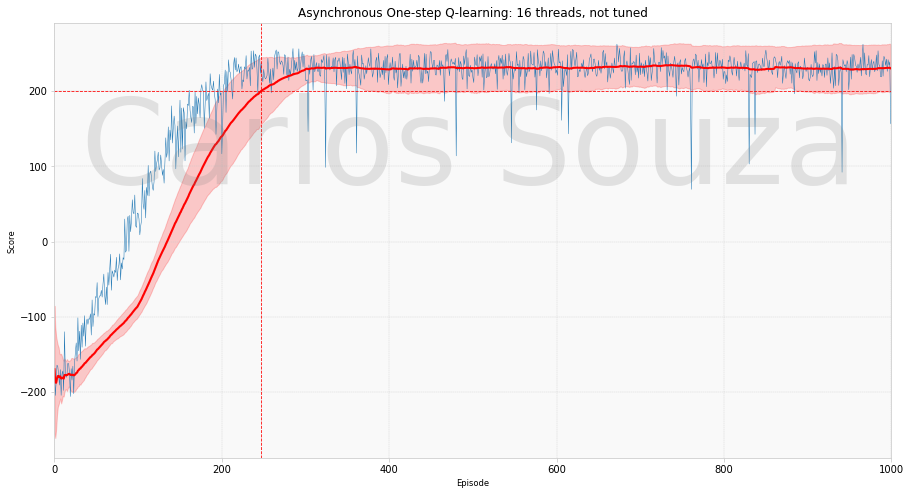

In [21]:
experiment = 'A'

df = load_experiment_df(f'{base_dir}/df_{experiment}.csv')
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(df[['score_mean']], linewidth=0.5)
ax.plot(df[['average_mean']], color='red', linewidth=2)
ax.fill_between(df.index, df['average_mean'], df['average_mean'] + df['average_std'], color='red', alpha=0.2)
ax.fill_between(df.index, df['average_mean'], df['average_mean'] - df['average_std'], color='red', alpha=0.2)
ax.axhline(200, color='red', linewidth=0.8, linestyle='--')
if df[df['average_mean'] > 200].shape[0] > 0:
    ax.axvline(df[df['average_mean'] > 200].iloc[0].name, color='red', linewidth=0.8, linestyle='--')

#ax.set_xlim(0, df[df['average_mean'] > 200].iloc[0].name + 100)
ax.set_xlim(0, 1000)

ax.set_title('Asynchronous One-step Q-learning: 16 threads, not tuned')
ax.set_xlabel('Episode', size='small')
ax.set_ylabel('Score', size='small')
ax.tick_params(axis='both', which='major', labelsize=10)

ax.grid(b=True, which='major', color='#cccccc', linewidth=0.4, linestyle='--')
ax.set_facecolor('#f9f9f9')
_ = plt.setp(ax.spines.values(), color='#cccccc')
_ = plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='#cccccc')

font = {'color':  'gray', 'weight': 'normal', 'size': 120, 'alpha': 0.2}
_ = fig.text(0.15, 0.6, 'Carlos Souza', fontdict=font)